In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

data_path = 'Housing_Prices_24.csv'
houseprice_data = pd.read_csv(data_path)


houseprice_data.head()



,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,PoolArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Foundation,CentralAir,KitchenQual,PavedDrive,YrSold
0,1,208500,8450,856,856,854,2,1,3,8,...,0,Inside,1Fam,2003,2003,PConc,Y,Gd,Y,2008
1,2,181500,9600,1262,1262,0,2,0,3,6,...,0,FR2,1Fam,1976,1976,CBlock,Y,TA,Y,2007
2,3,223500,11250,920,920,866,2,1,3,6,...,0,Inside,1Fam,2001,2002,PConc,Y,Gd,Y,2008
3,4,140000,9550,756,961,756,1,0,3,7,...,0,Corner,1Fam,1915,1970,BrkTil,Y,Gd,Y,2006
4,5,250000,14260,1145,1145,1053,2,1,4,9,...,0,FR2,1Fam,2000,2000,PConc,Y,Gd,Y,2008


In [4]:
houseprice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   SalePrice      1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   TotalBsmtSF    1460 non-null   int64 
 4   1stFlrSF       1460 non-null   int64 
 5   2ndFlrSF       1460 non-null   int64 
 6   FullBath       1460 non-null   int64 
 7   HalfBath       1460 non-null   int64 
 8   BedroomAbvGr   1460 non-null   int64 
 9   TotRmsAbvGrd   1460 non-null   int64 
 10  Fireplaces     1460 non-null   int64 
 11  GarageCars     1460 non-null   int64 
 12  WoodDeckSF     1460 non-null   int64 
 13  OpenPorchSF    1460 non-null   int64 
 14  EnclosedPorch  1460 non-null   int64 
 15  3SsnPorch      1460 non-null   int64 
 16  ScreenPorch    1460 non-null   int64 
 17  PoolArea       1460 non-null   int64 
 18  LotConfig      1460 non-null

In [5]:
houseprice_data.isna().sum()

Id               0
SalePrice        0
LotArea          0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
LotConfig        0
BldgType         0
YearBuilt        0
YearRemodAdd     0
Foundation       0
CentralAir       0
KitchenQual      0
PavedDrive       0
YrSold           0
dtype: int64

In [6]:
min_year_sold = houseprice_data['YrSold'].min()  
max_year_sold = houseprice_data['YrSold'].max() 
min_year_built = houseprice_data['YearBuilt'].min()  
max_year_built = houseprice_data['YearBuilt'].max() 
print(min_year_sold)
print(max_year_sold)
print(min_year_built)
print(max_year_built)

2006
2010
1872
2010


Text(0, 0.5, 'Sale Price (USD)')

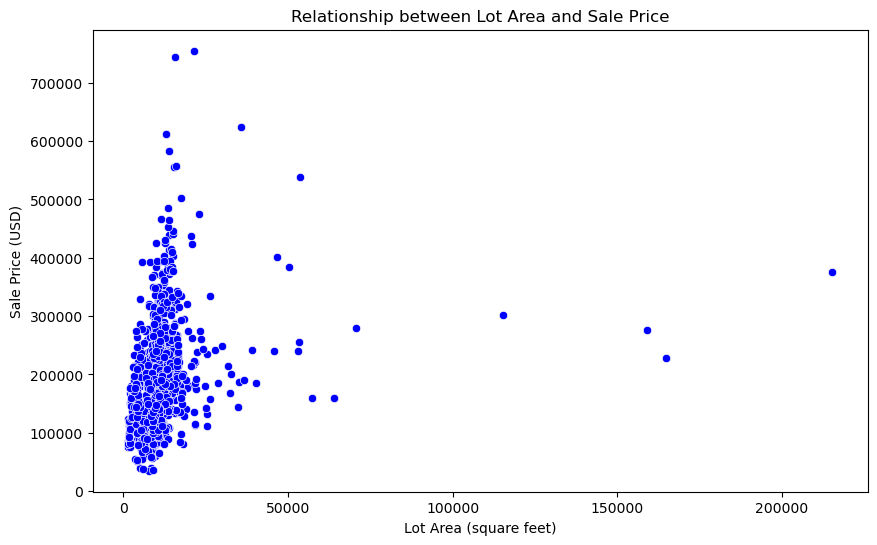

In [7]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='LotArea', y='SalePrice', data=houseprice_data, color='blue')

plt.title('Relationship between Lot Area and Sale Price')
plt.xlabel('Lot Area (square feet)')
plt.ylabel('Sale Price (USD)')


Text(0, 0.5, 'Sale Price (USD)')

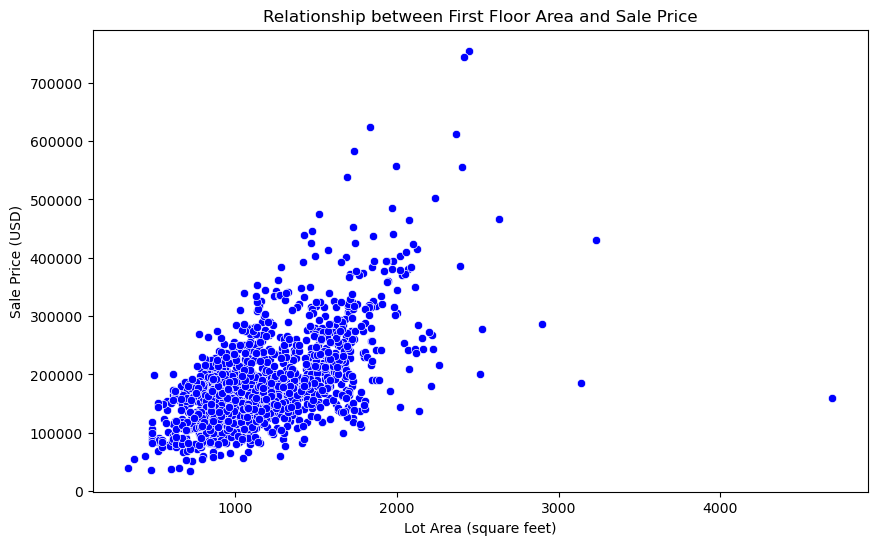

In [8]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='1stFlrSF', y='SalePrice', data=houseprice_data, color='blue')

plt.title('Relationship between First Floor Area and Sale Price')
plt.xlabel('Lot Area (square feet)')
plt.ylabel('Sale Price (USD)')


Text(0, 0.5, 'Sale Price (USD)')

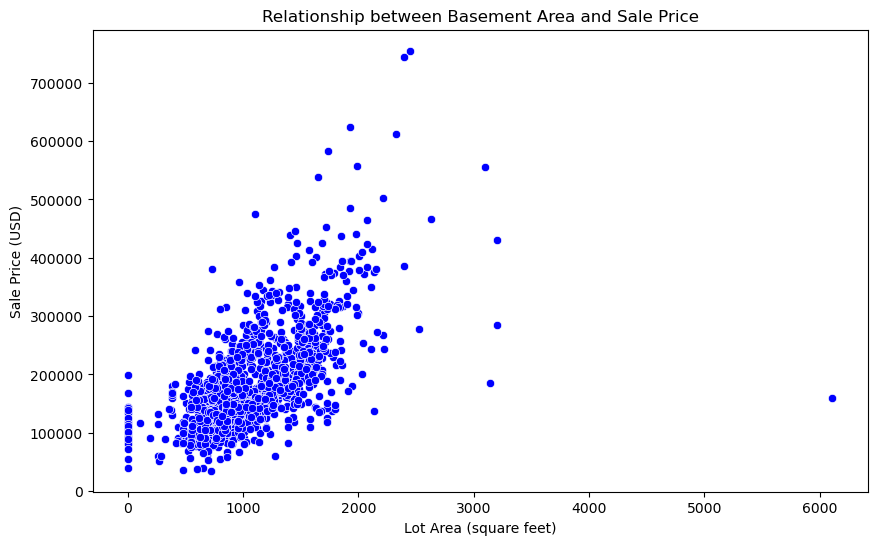

In [9]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=houseprice_data, color='blue')

plt.title('Relationship between Basement Area and Sale Price')
plt.xlabel('Lot Area (square feet)')
plt.ylabel('Sale Price (USD)')


Text(0, 0.5, 'Sale Price (USD)')

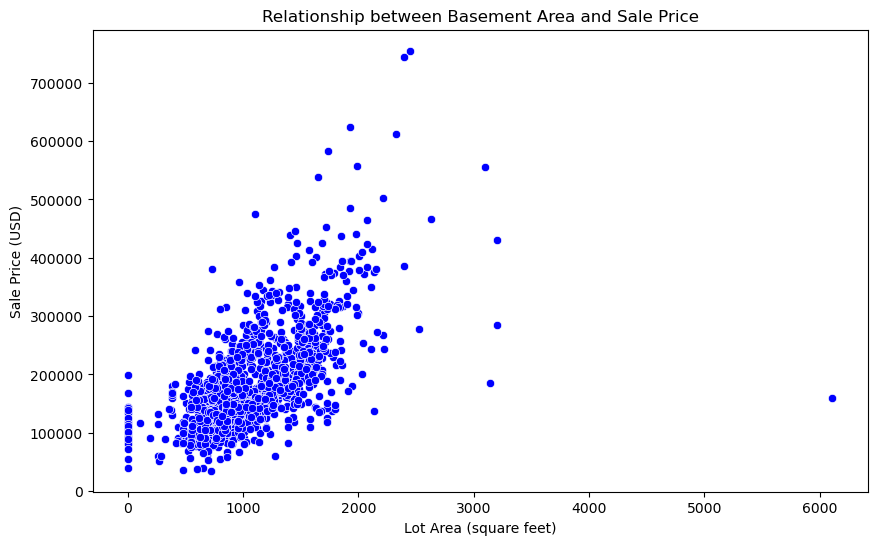

In [10]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=houseprice_data, color='blue')

plt.title('Relationship between Basement Area and Sale Price')
plt.xlabel('Lot Area (square feet)')
plt.ylabel('Sale Price (USD)')


In [11]:
# filter out invalid value of sale price
SalePrice_Q1 = houseprice_data['SalePrice'].quantile(0.05)
SalePrice_Q3 = houseprice_data['SalePrice'].quantile(0.95)
SalePrice_IQR = SalePrice_Q3 - SalePrice_Q1

print(SalePrice_Q1)
print(SalePrice_Q3)

SalePrice_lower_bound = SalePrice_Q1 - 1.5 * SalePrice_IQR
SalePrice_upper_bound = SalePrice_Q3 + 1.5 * SalePrice_IQR



# filter out invalid value of lot area
LotArea_Q1 = houseprice_data['LotArea'].quantile(0.05)
LotArea_Q3 = houseprice_data['LotArea'].quantile(0.95)
LotArea_IQR = LotArea_Q3 - LotArea_Q1

print(LotArea_Q1)
print(LotArea_Q3)

LotArea_lower_bound = LotArea_Q1 - 1.5 * LotArea_IQR
LotArea_upper_bound = LotArea_Q3 + 1.5 * LotArea_IQR



# filter out invalid value of basement area
TotalBsmtSF_Q1 = houseprice_data['TotalBsmtSF'].quantile(0.05)
TotalBsmtSF_Q3 = houseprice_data['TotalBsmtSF'].quantile(0.95)
TotalBsmtSF_IQR = TotalBsmtSF_Q3 - TotalBsmtSF_Q1

print(TotalBsmtSF_Q1)
print(TotalBsmtSF_Q3)

TotalBsmtSF_lower_bound = TotalBsmtSF_Q1 - 1.5 * TotalBsmtSF_IQR
TotalBsmtSF_upper_bound = TotalBsmtSF_Q3 + 1.5 * TotalBsmtSF_IQR


# filter out invalid value of first floor area
firstFlrSF_Q1 = houseprice_data['1stFlrSF'].quantile(0.05)
firstFlrSF_Q3 = houseprice_data['1stFlrSF'].quantile(0.95)
firstFlrSF_IQR = firstFlrSF_Q3 - firstFlrSF_Q1

print(firstFlrSF_Q1)
print(firstFlrSF_Q3)

firstFlrSF_lower_bound = firstFlrSF_Q1 - 1.5 * firstFlrSF_IQR
firstFlrSF_upper_bound = firstFlrSF_Q3 + 1.5 * firstFlrSF_IQR





houseprice_data_filtered = houseprice_data[
    (houseprice_data['SalePrice'] >= SalePrice_lower_bound) & 
    (houseprice_data['SalePrice'] <= SalePrice_upper_bound) &
    (houseprice_data['LotArea'] >= LotArea_lower_bound) & 
    (houseprice_data['LotArea'] <= LotArea_upper_bound) &
    (houseprice_data['1stFlrSF'] >= LotArea_lower_bound) & 
    (houseprice_data['1stFlrSF'] <= LotArea_upper_bound) &
    (houseprice_data['TotalBsmtSF'] >= LotArea_lower_bound) & 
    (houseprice_data['TotalBsmtSF'] <= LotArea_upper_bound)
]


remaining_rows = len(houseprice_data_filtered)
print(remaining_rows)

88000.0
326099.9999999999
3311.7000000000003
17401.149999999998
519.3000000000001
1753.0
672.95
1831.2499999999998
1443


Text(0, 0.5, 'Sale Price (USD)')

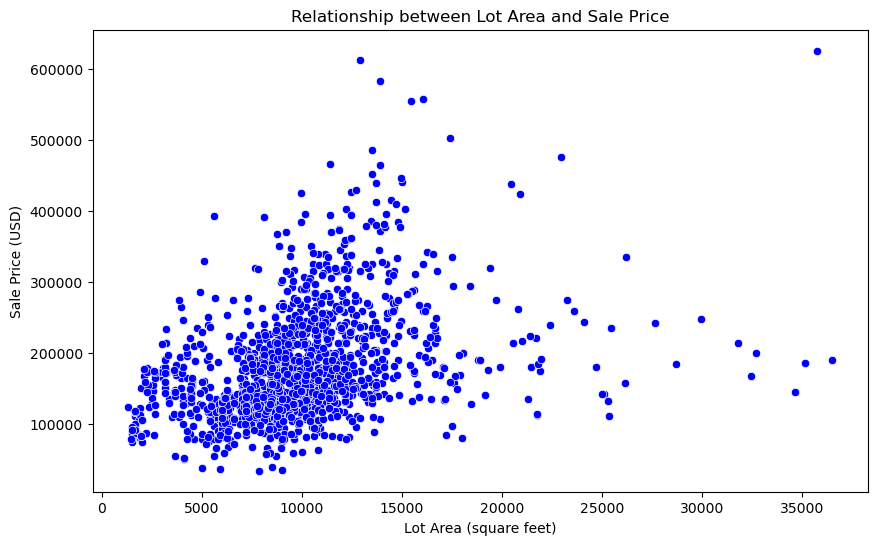

In [12]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='LotArea', y='SalePrice', data=houseprice_data_filtered, color='blue')

plt.title('Relationship between Lot Area and Sale Price')
plt.xlabel('Lot Area (square feet)')
plt.ylabel('Sale Price (USD)')


Text(0, 0.5, 'Sale Price (USD)')

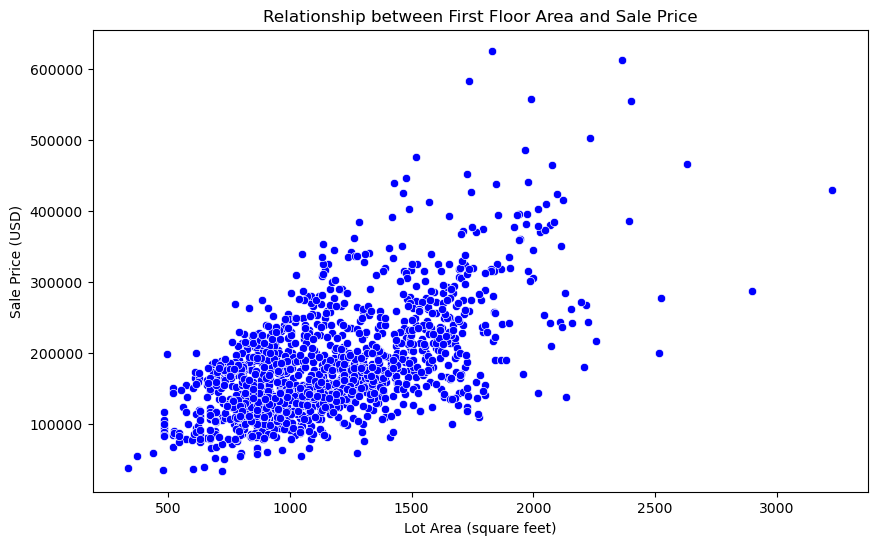

In [13]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='1stFlrSF', y='SalePrice', data=houseprice_data_filtered, color='blue')

plt.title('Relationship between First Floor Area and Sale Price')
plt.xlabel('Lot Area (square feet)')
plt.ylabel('Sale Price (USD)')


Text(0, 0.5, 'Sale Price (USD)')

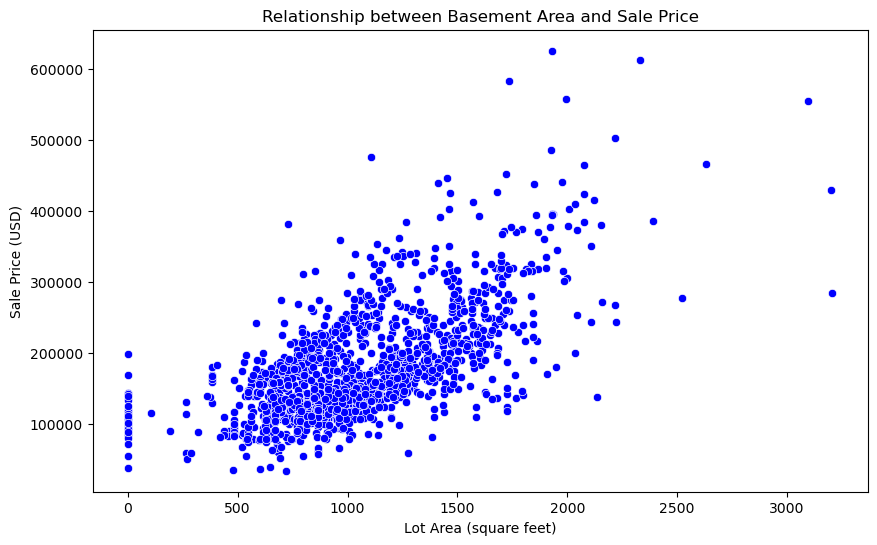

In [14]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=houseprice_data_filtered, color='blue')

plt.title('Relationship between Basement Area and Sale Price')
plt.xlabel('Lot Area (square feet)')
plt.ylabel('Sale Price (USD)')


In [15]:
# check invalid value
invalid_values_LotConfig = houseprice_data_filtered[~houseprice_data_filtered['LotConfig'].isin(['Inside', 'FR3', 'FR2', 'CulDSac', 'Corner'])]
print("Invalid values in 'LotConfig':")
print(invalid_values_LotConfig)


invalid_values_BldgType = houseprice_data_filtered[~houseprice_data_filtered['BldgType'].isin(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'])]
print("Invalid values in 'BldgType':")
print(invalid_values_BldgType)


invalid_values_Foundation = houseprice_data_filtered[~houseprice_data_filtered['Foundation'].isin(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'])]
print("Invalid values in 'Foundation':")
print(invalid_values_Foundation)


invalid_values_CentralAir = houseprice_data_filtered[~houseprice_data_filtered['CentralAir'].isin(['Y', 'N'])]
print("Invalid values in 'CentralAir':")
print(invalid_values_CentralAir)


invalid_values_KitchenQual = houseprice_data_filtered[~houseprice_data_filtered['KitchenQual'].isin(['Gd', 'Fa', 'Ex', 'TA'])]
print("Invalid values in 'KitchenQual':")
print(invalid_values_KitchenQual)


invalid_values_PavedDrive = houseprice_data_filtered[~houseprice_data_filtered['PavedDrive'].isin(['Y', 'N', 'P'])]
print("Invalid values in 'PavedDrive':")
print(invalid_values_PavedDrive)


Invalid values in 'LotConfig':
Empty DataFrame
Columns: [Id, SalePrice, LotArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, FullBath, HalfBath, BedroomAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, LotConfig, BldgType, YearBuilt, YearRemodAdd, Foundation, CentralAir, KitchenQual, PavedDrive, YrSold]
Index: []

[0 rows x 27 columns]
Invalid values in 'BldgType':
Empty DataFrame
Columns: [Id, SalePrice, LotArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, FullBath, HalfBath, BedroomAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, LotConfig, BldgType, YearBuilt, YearRemodAdd, Foundation, CentralAir, KitchenQual, PavedDrive, YrSold]
Index: []

[0 rows x 27 columns]
Invalid values in 'Foundation':
Empty DataFrame
Columns: [Id, SalePrice, LotArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, FullBath, HalfBath, BedroomAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, WoodDeckSF, OpenPorchS

In [16]:
df = pd.get_dummies(houseprice_data_filtered, columns=[
    'LotConfig',     # 地块位置
    'BldgType',      # 房屋类型
    'Foundation',    # 地基类型
    'CentralAir',    # 是否有中央空调
    'KitchenQual',   # 厨房质量
    'PavedDrive'     # 车道铺设情况
], drop_first=True) 


df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1443 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Id                 1443 non-null   int64
 1   SalePrice          1443 non-null   int64
 2   LotArea            1443 non-null   int64
 3   TotalBsmtSF        1443 non-null   int64
 4   1stFlrSF           1443 non-null   int64
 5   2ndFlrSF           1443 non-null   int64
 6   FullBath           1443 non-null   int64
 7   HalfBath           1443 non-null   int64
 8   BedroomAbvGr       1443 non-null   int64
 9   TotRmsAbvGrd       1443 non-null   int64
 10  Fireplaces         1443 non-null   int64
 11  GarageCars         1443 non-null   int64
 12  WoodDeckSF         1443 non-null   int64
 13  OpenPorchSF        1443 non-null   int64
 14  EnclosedPorch      1443 non-null   int64
 15  3SsnPorch          1443 non-null   int64
 16  ScreenPorch        1443 non-null   int64
 17  PoolArea           

In [17]:
# Calculate correlation matrix
cormat = df.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Display correlation matrix
print(cormat)

                     Id  SalePrice  LotArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
Id                 1.00      -0.02     0.02        -0.02      0.01      0.00   
SalePrice         -0.02       1.00     0.38         0.64      0.62      0.30   
LotArea            0.02       0.38     1.00         0.30      0.40      0.10   
TotalBsmtSF       -0.02       0.64     0.30         1.00      0.80     -0.23   
1stFlrSF           0.01       0.62     0.40         0.80      1.00     -0.25   
2ndFlrSF           0.00       0.30     0.10        -0.23     -0.25      1.00   
FullBath           0.00       0.57     0.18         0.32      0.38      0.41   
HalfBath           0.01       0.28     0.08        -0.07     -0.14      0.61   
BedroomAbvGr       0.03       0.16     0.27         0.05      0.13      0.50   
TotRmsAbvGrd       0.02       0.54     0.35         0.26      0.39      0.61   
Fireplaces        -0.02       0.46     0.30         0.31      0.39      0.19   
GarageCars         0.02       0.65     0

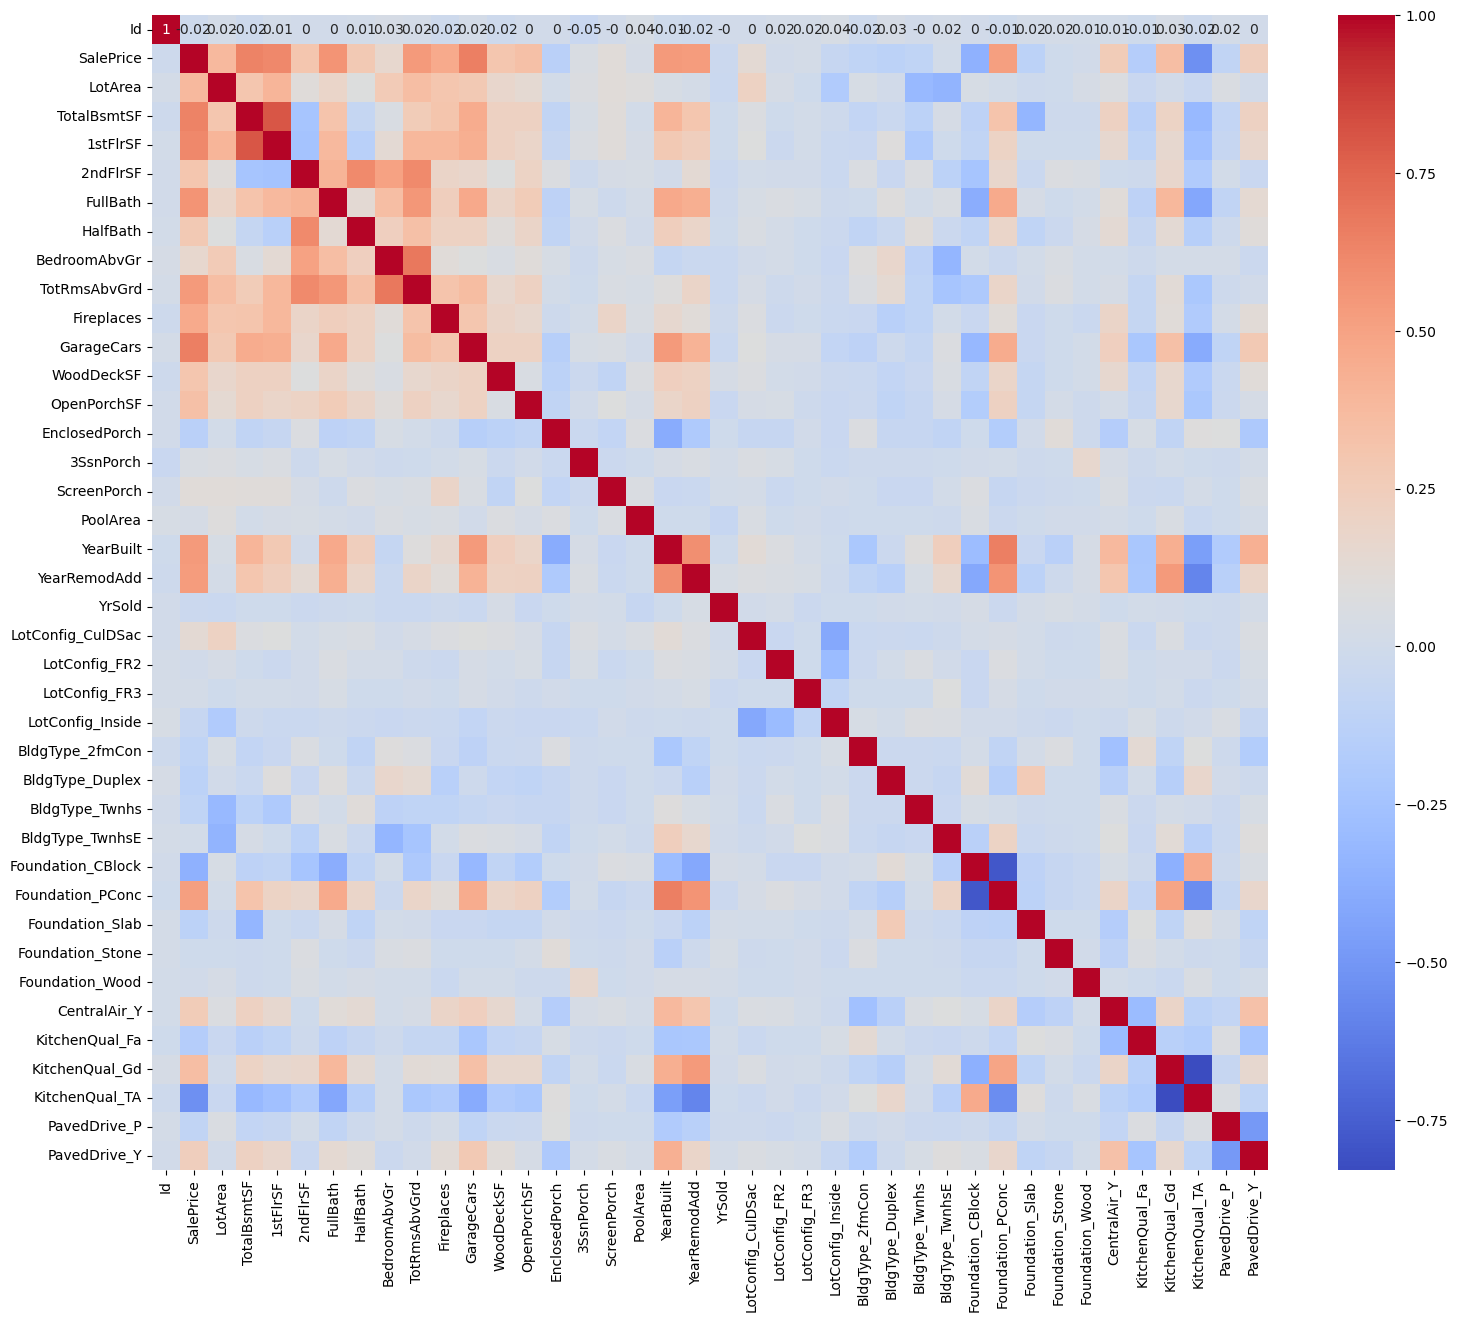

In [18]:

# Plot correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(cormat, annot=True, cmap='coolwarm')
plt.show()



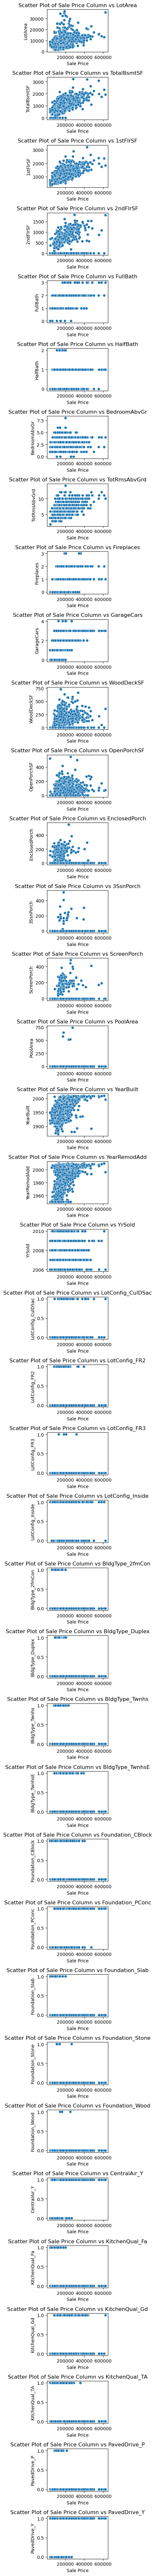

In [19]:
# 获取第二列（索引为 1）与所有其他列
salePrice_column = df.iloc[:, 1]
other_columns = df.iloc[:, 2:]

# 创建一个绘图区域
plt.figure(figsize=(3, 80))

# 绘制第二列与其他列的散点图
for i, col in enumerate(other_columns.columns):
    plt.subplot(len(other_columns.columns), 1, i + 1)
    sns.scatterplot(x=salePrice_column, y=other_columns[col])
    plt.title(f'Scatter Plot of Sale Price Column vs {col}')
    plt.xlabel('Sale Price')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [95]:
# Perform linear regression
df_encoded = df.astype(int)
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())

df_encoded.info()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     202.2
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:06:53   Log-Likelihood:                -16893.
No. Observations:                1443   AIC:                         3.387e+04
Df Residuals:                    1403   BIC:                         3.408e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.964e+05   1.21e+0

In [41]:
vifres = pd.DataFrame()
vifres['Variable'] = X.columns
vifres['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vifres)

             Variable           VIF
0               const  2.362448e+06
1                  Id  1.021788e+00
2             LotArea  1.840496e+00
3         TotalBsmtSF  4.727117e+00
4            1stFlrSF  6.511331e+00
5            2ndFlrSF  5.717940e+00
6            FullBath  2.851683e+00
7            HalfBath  2.200869e+00
8        BedroomAbvGr  2.437300e+00
9        TotRmsAbvGrd  4.746944e+00
10         Fireplaces  1.529748e+00
11         GarageCars  2.015612e+00
12         WoodDeckSF  1.182621e+00
13        OpenPorchSF  1.208562e+00
14      EnclosedPorch  1.296453e+00
15          3SsnPorch  1.055309e+00
16        ScreenPorch  1.129182e+00
17           PoolArea  1.044577e+00
18          YearBuilt  4.983440e+00
19       YearRemodAdd  2.323064e+00
20             YrSold  1.027703e+00
21  LotConfig_CulDSac  1.343585e+00
22      LotConfig_FR2  1.196301e+00
23      LotConfig_FR3  1.032077e+00
24   LotConfig_Inside  1.457121e+00
25    BldgType_2fmCon  1.147171e+00
26    BldgType_Duplex  1.316

In [45]:
import statsmodels.api as sm
import numpy as np

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out=0.05, 
                       verbose=True):
    """逐步前向和后向特征选择，使用 p-value 做特征的添加或删除
    
    参数:
    -----------
    X : pandas DataFrame 特征集
    y : pandas Series 目标变量
    initial_list : list 初始的特征列表
    threshold_in : float 添加新特征时的显著性阈值 (p-value)
    threshold_out: float 移除特征时的显著性阈值 (p-value)
    verbose : bool 打印每个步骤的信息
    
    返回:
    -----------
    list : 最终选择的特征列表
    """
    
    included = list(initial_list)
    while True:
        changed = False
        
        # forward step (尝试向模型中添加新特征)
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval}')
        
        # backward step (尝试从模型中移除特征)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]  # 省略常数项的p值
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f'Remove {worst_feature} with p-value {worst_pval}')
        
        if not changed:
            break

    return included


selected_features = stepwise_selection(X,y)
print('resulting features:')
print(selected_features)

Add  const with p-value 0.0
Add  GarageCars with p-value 1.6498364016122034e-173
Add  TotalBsmtSF with p-value 7.125560200782606e-100
Add  2ndFlrSF with p-value 1.9728594318891368e-106
Add  YearRemodAdd with p-value 6.350735452274199e-41
Add  1stFlrSF with p-value 8.753561593542951e-46
Add  BedroomAbvGr with p-value 1.7524107703164012e-21
Add  YearBuilt with p-value 2.911034141572179e-21
Add  LotArea with p-value 1.0000443810618799e-11
Add  BldgType_Duplex with p-value 2.357404199517283e-09
Add  KitchenQual_TA with p-value 4.6476272636308425e-07
Add  KitchenQual_Gd with p-value 4.431386908131577e-34
Add  KitchenQual_Fa with p-value 2.2433912349687072e-21
Add  Fireplaces with p-value 1.9796380833394044e-05
Add  BldgType_TwnhsE with p-value 0.001041543239426762
Add  BldgType_Twnhs with p-value 0.00026897554459570124
Add  Foundation_CBlock with p-value 0.003924555425208918
resulting features:
['const', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'BedroomAbvGr', 'Y

Text(0.5, 1.0, 'Comparative Boxplot of Price by Foundation')

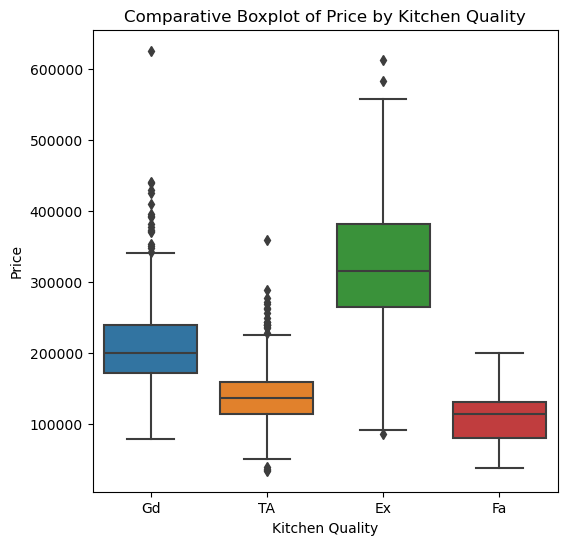

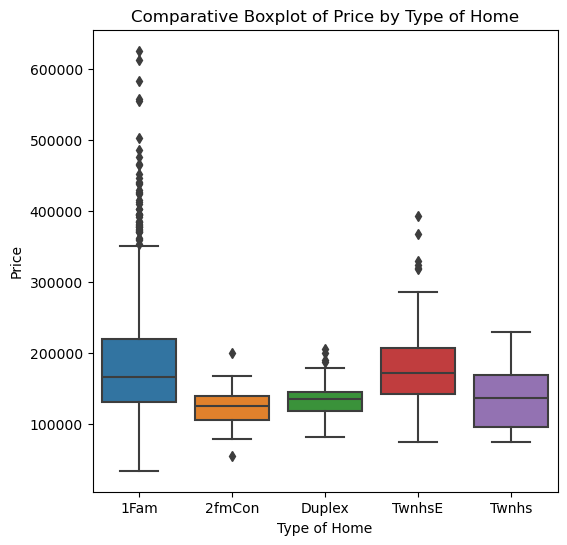

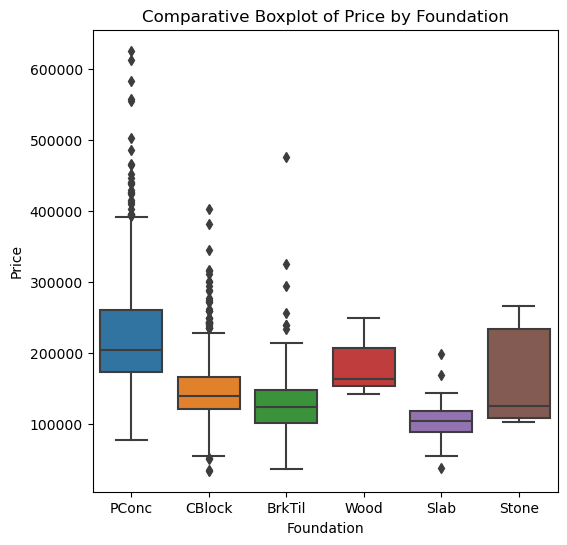

In [60]:
# look at KitchenQuality vs price
plt.figure(figsize=(6, 6))
sns.boxplot(x='KitchenQual',y='SalePrice',data=houseprice_data_filtered)
plt.xlabel('Kitchen Quality')
plt.ylabel('Price')
plt.title('Comparative Boxplot of Price by Kitchen Quality')


# look at BldgType vs price
plt.figure(figsize=(6, 6))
sns.boxplot(x='BldgType',y='SalePrice',data=houseprice_data_filtered)
plt.xlabel('Type of Home')
plt.ylabel('Price')
plt.title('Comparative Boxplot of Price by Type of Home')

# look at Foundation vs price
plt.figure(figsize=(6, 6))
sns.boxplot(x='Foundation',y='SalePrice',data=houseprice_data_filtered)
plt.xlabel('Foundation')
plt.ylabel('Price')
plt.title('Comparative Boxplot of Price by Foundation')








In [53]:
X = houseprice_data_filtered[['GarageCars',
        'TotalBsmtSF',
        '2ndFlrSF',
        'YearRemodAdd',
        '1stFlrSF',
        'BedroomAbvGr',
        'YearBuilt',
        'LotArea',
        'BldgType',
        'KitchenQual',
        'Fireplaces',
        'BldgType',
        'Foundation']]
X = pd.get_dummies(X, columns = ['KitchenQual', 'BldgType', 'Foundation'], drop_first = True, dtype='float')
X = sm.add_constant(X)

stepreg = sm.OLS(y,X).fit()
print(stepreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     370.3
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:38:03   Log-Likelihood:                -16910.
No. Observations:                1443   AIC:                         3.386e+04
Df Residuals:                    1421   BIC:                         3.398e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.349e+06   1.25e+0

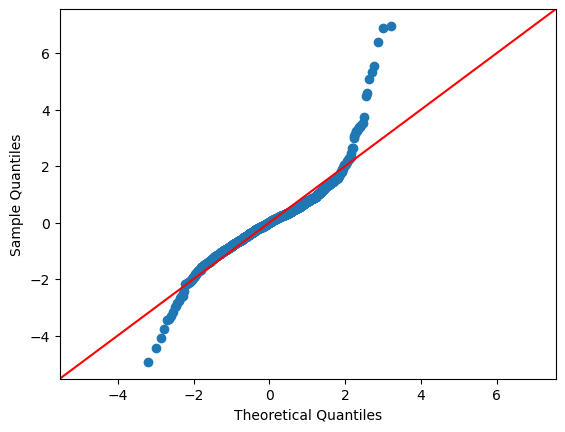

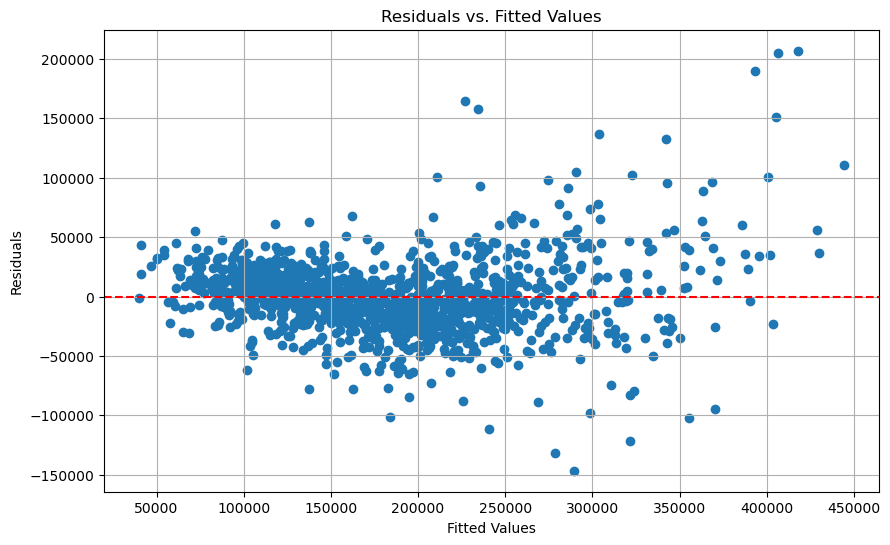

In [67]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()
# Residuals vs. Fitted
plt. figure(figsize=(10, 6))
plt. scatter (stepreg.fittedvalues, residuals)
plt.xlabel( 'Fitted Values')
plt.ylabel ('Residuals')
plt. title( 'Residuals vs. Fitted Values')
plt. axhline(y=0, color='r', linestyle='--')
plt.grid (True)
plt.show()

In [65]:
X = houseprice_data_filtered[['GarageCars',
        'TotalBsmtSF',
        '2ndFlrSF',
        'YearRemodAdd',
        '1stFlrSF',
        'BedroomAbvGr',
        'YearBuilt',
        'LotArea',
        'BldgType',
        'KitchenQual',
        'Fireplaces',
        'BldgType',
        'Foundation']]
X = sm.add_constant(X)
X = pd.get_dummies(X, columns = ['KitchenQual', 'BldgType', 'Foundation'], drop_first = True, dtype='float')
logy = np.log(y)
logreg = sm.OLS(logy, X).fit()

print(logreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     404.7
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:53:57   Log-Likelihood:                 701.40
No. Observations:                1443   AIC:                            -1359.
Df Residuals:                    1421   BIC:                            -1243.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4724      0.62

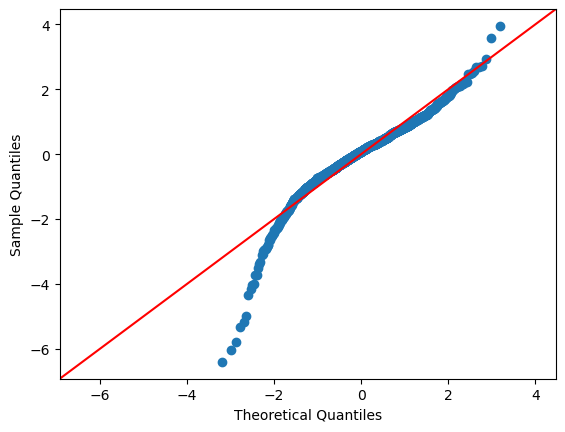

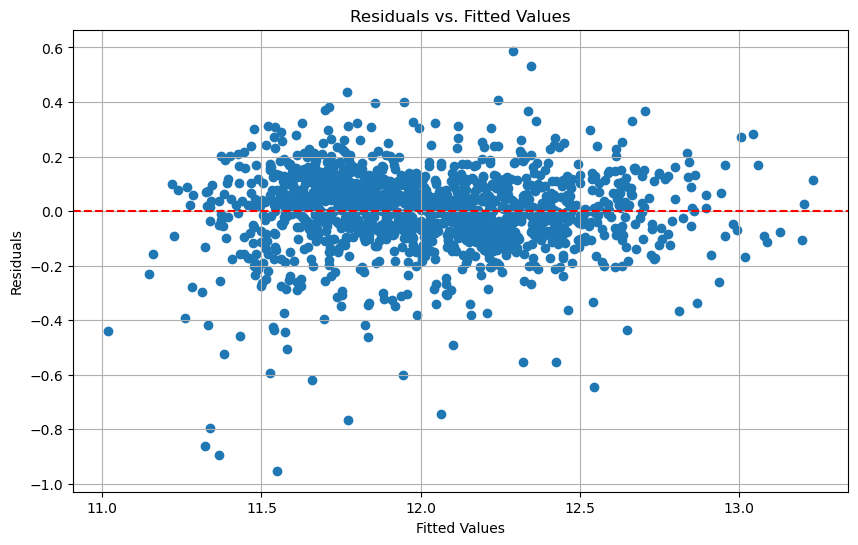

In [70]:
# Calculate residuals
residuals = logreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()
# Residuals vs. Fitted
plt. figure(figsize=(10, 6))
plt. scatter (logreg.fittedvalues, residuals)
plt.xlabel( 'Fitted Values')
plt.ylabel ('Residuals')
plt. title( 'Residuals vs. Fitted Values')
plt. axhline(y=0, color='r', linestyle='--')
plt.grid (True)
plt.show()

In [97]:
X = houseprice_data_filtered[['GarageCars',
        'TotalBsmtSF',
        '2ndFlrSF',
        'YearRemodAdd',
        '1stFlrSF',
        'BedroomAbvGr',
        'LotArea',
        'KitchenQual',
        'Fireplaces',
        'BldgType',
        'YearBuilt'
        ]]
X = sm.add_constant(X)
X = pd.get_dummies(X, columns = ['KitchenQual', 'BldgType' ], drop_first = True, dtype='float')
logy = np.log(y)
logreg2 = sm.OLS(logy, X).fit()

print(logreg2.summary())

vifres = pd.DataFrame()
vifres['Variable'] = X.columns
vifres['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vifres)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     531.0
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:26:34   Log-Likelihood:                 699.00
No. Observations:                1443   AIC:                            -1364.
Df Residuals:                    1426   BIC:                            -1274.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0679      0.550     

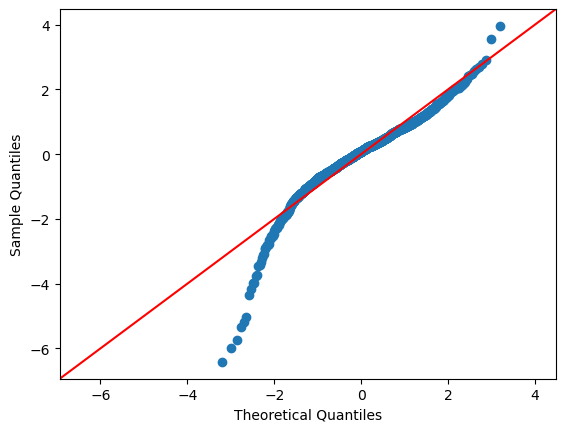

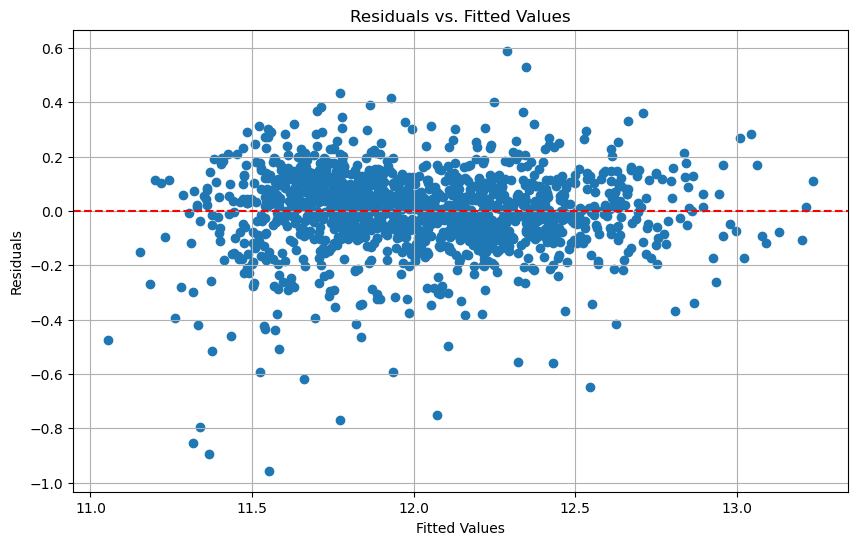

In [78]:
# Calculate residuals
residuals2 = logreg2.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals2,fit=True, line='45')
plt.show()
# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter (logreg2.fittedvalues, residuals2)
plt.xlabel( 'Fitted Values')
plt.ylabel ('Residuals')
plt.title( 'Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid (True)
plt.show()

             Variable           VIF
0               const  2.362448e+06
1                  Id  1.021788e+00
2             LotArea  1.840496e+00
3         TotalBsmtSF  4.727117e+00
4            1stFlrSF  6.511331e+00
5            2ndFlrSF  5.717940e+00
6            FullBath  2.851683e+00
7            HalfBath  2.200869e+00
8        BedroomAbvGr  2.437300e+00
9        TotRmsAbvGrd  4.746944e+00
10         Fireplaces  1.529748e+00
11         GarageCars  2.015612e+00
12         WoodDeckSF  1.182621e+00
13        OpenPorchSF  1.208562e+00
14      EnclosedPorch  1.296453e+00
15          3SsnPorch  1.055309e+00
16        ScreenPorch  1.129182e+00
17           PoolArea  1.044577e+00
18          YearBuilt  4.983440e+00
19       YearRemodAdd  2.323064e+00
20             YrSold  1.027703e+00
21  LotConfig_CulDSac  1.343585e+00
22      LotConfig_FR2  1.196301e+00
23      LotConfig_FR3  1.032077e+00
24   LotConfig_Inside  1.457121e+00
25    BldgType_2fmCon  1.147171e+00
26    BldgType_Duplex  1.316

In [98]:
X = houseprice_data_filtered[['GarageCars',
        'TotalBsmtSF',
        '2ndFlrSF',
        'YearRemodAdd',
        '1stFlrSF',
        'BedroomAbvGr',
        'LotArea',
        
        'Fireplaces',
        
        'YearBuilt'
        ]]
X = sm.add_constant(X)

logy = np.log(y)
logreg3 = sm.OLS(logy, X).fit()

print(logreg3.summary())

vifres = pd.DataFrame()
vifres['Variable'] = X.columns
vifres['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vifres)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     838.4
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:34:25   Log-Likelihood:                 623.35
No. Observations:                1443   AIC:                            -1227.
Df Residuals:                    1433   BIC:                            -1174.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1440      0.477     -2.397   

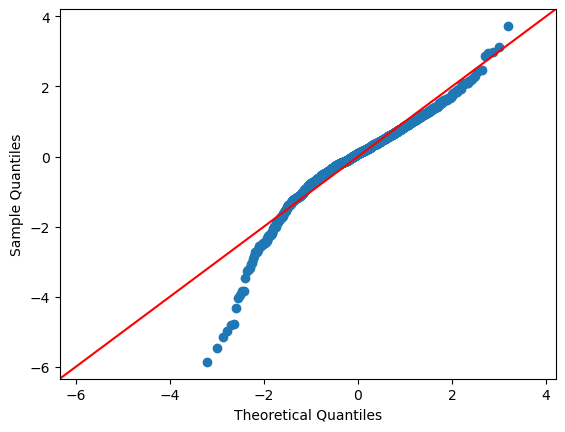

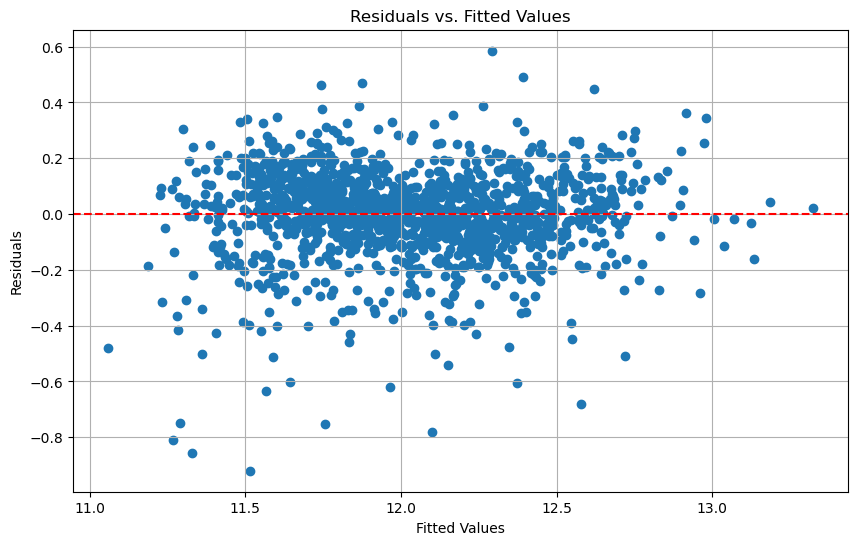

In [99]:
# Calculate residuals
residuals3 = logreg3.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals3,fit=True, line='45')
plt.show()
# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter (logreg3.fittedvalues, residuals3)
plt.xlabel( 'Fitted Values')
plt.ylabel ('Residuals')
plt.title( 'Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid (True)
plt.show()

In [101]:

# load new data


prediction_data = pd.read_csv('homesforsale.csv')

# Create X-matrix for regression (e.g., add / delete / modify any variables that were added / deleted / modified when creating the model)

Xnew = prediction_data[[
        'GarageCars',
        'TotalBsmtSF',
        '2ndFlrSF',
        'YearRemodAdd',
        '1stFlrSF',
        'BedroomAbvGr',
        'LotArea',
        'KitchenQual',
        'Fireplaces',
        'BldgType',
        'YearBuilt'
        ]]
Xnew = pd.get_dummies(Xnew, columns=['KitchenQual', 'BldgType'], drop_first=True)
Xnew = sm.add_constant(Xnew)
Xnew = Xnew.reindex(columns=X.columns, fill_value=0)

# make predictions
import numpy as np
predictions = logreg3.predict(Xnew)
print(predictions)

predictions = predictions.astype(float)  # 将数据类型转换为 float
y_predictions = np.exp(predictions)  # 逐元素计算指数
print(y_predictions)

0    11.970666
1    12.004851
2    12.296761
3    12.684036
4    11.620731
dtype: float64
0    158049.809359
1    163546.280748
2    218985.437245
3    322557.123658
4    111383.104258
dtype: float64
